In [2]:
import pandas as pd
from pathlib import Path

from DataAnalysisClass import *

october_absolute_kain_path = Path('/mnt/data/madness_data/october_beta_absolute_kain/')
paper_path = Path('/home/adrianhurtado/projects/writing/mra-tdhf-polarizability/Figures_v2')
paper_path = Path('/home/adrianhurtado/projects/writing/thesis2023/PresentationMaterials')



In [3]:

single = ['aug-cc-pVDZ', 'aug-cc-pVTZ', 'aug-cc-pVQZ', 'aug-cc-pV5Z', 'aug-cc-pV6Z']
single_polarized = ['aug-cc-pCVDZ', 'aug-cc-pCVTZ', 'aug-cc-pCVQZ']
double = ['d-aug-cc-pVDZ', 'd-aug-cc-pVTZ', 'd-aug-cc-pVQZ', 'd-aug-cc-pV5Z', 'd-aug-cc-pV6Z']
double_polarized = ['d-aug-cc-pCVDZ', 'd-aug-cc-pCVTZ', 'd-aug-cc-pCVQZ']
all_basis_sets = single + single_polarized + double + double_polarized


In [4]:
import glob

beta_path = Path('/mnt/data/madness_data/august_no_symmetry')
beta_mol = '/mnt/data/madness_data/august_no_symmetry/molecules/*.mol'

# glob for .mol files in august molecules directory
mols = glob.glob(beta_mol)
# remove .mol extension
mols = [mol.split('/')[-1].split('.')[0] for mol in mols]
print(mols)


['FNO', 'CH3SH', 'C2H4', 'H2', 'Cl2', 'N2H2', 'CH3NH2', 'HOCl', 'BeH2', 'SiO', 'Mg', 'HBS', 'HBO', 'CH2BH', 'Ne', 'PH3O', 'ClF', 'HF', 'BH2Cl', 'Li2', 'SiH4', 'SF2', 'P2H4', 'CO2', 'NaCN', 'Ar', 'OCl2', 'P2', 'CH3Cl', 'SCl2', 'HCCF', 'LiH', 'BF', 'SiH3F', 'HCONH2', 'He', 'CS', 'S2H2', 'FCN', 'NaCl', 'SiH3Cl', 'N2H4', 'NH2Cl', 'LiCl', 'NH3O', 'NH2OH', 'BH3', 'SO2', 'HCN', 'CH3BH2', 'NaLi', 'HOF', 'CH3F', 'HNS', 'CH3OH', 'C2H2', 'Na2', 'F2', 'O3', 'C6H6', 'CH2NH', 'ClCN', 'Mg2', 'NH3', 'H2O', 'PH3', 'N2', 'BHF2', 'LiCN', 'NH2F', 'Be', 'CH4', 'HCl', 'HCCCl', 'HCOOH', 'HCHS', 'LiH_s', 'HCHO', 'SH2', 'CSO', 'HOOH', 'CO', 'HCP', 'NOCl', 'HNO', 'NaH', 'OF2', 'HNC', 'BH2F', 'LiBH4']


In [5]:

beta_path = Path('/mnt/data/madness_data/august_no_symmetry')
quad_data = QuadraticDatabase(mols, all_basis_sets, 'hf', 'dipole', [0], beta_path, False)
quad_data.save_dfs()
# save data


In [6]:

basis_data = quad_data.beta_hrs_df.query('basis!="MRA" & Afreq==0.0').copy()
basis_data['beta_MRA'] = basis_data['molecule'].map(quad_data.beta_hrs_df.query('basis=="MRA" & '
                                                                                'Afreq==0.0')
                                                    .set_index('molecule')['Beta'].to_dict())
basis_data['betaE'] = 100 * (basis_data['Beta'] - basis_data['beta_MRA']) / basis_data['beta_MRA']
basis_data = make_detailed_df(basis_data)
basis_data


['D', 'T', 'Q', '5']


,molecule,basis,Afreq,Bfreq,Cfreq,dipolar,octupolar,Beta,beta_MRA,betaE,augmentation,polarization,mol_system,valence,Type
0,FNO,aug-cc-pVDZ,0.0,0.0,0.0,318.515549,171.917420,9.335648,8.660263,7.798662,aug,V,Fluorine,D,aug-cc-pVnZ
1,FNO,aug-cc-pVTZ,0.0,0.0,0.0,101.235090,27.045647,5.007241,8.660263,-42.181422,aug,V,Fluorine,T,aug-cc-pVnZ
2,FNO,aug-cc-pVQZ,0.0,0.0,0.0,261.019272,210.876440,8.836728,8.660263,2.037632,aug,V,Fluorine,Q,aug-cc-pVnZ
3,FNO,aug-cc-pV5Z,0.0,0.0,0.0,251.002691,225.886484,8.791551,8.660263,1.515983,aug,V,Fluorine,5,aug-cc-pVnZ
4,FNO,aug-cc-pCVDZ,0.0,0.0,0.0,323.232905,172.248828,9.393305,8.660263,8.464432,aug,CV,Fluorine,D,aug-cc-pCVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,LiBH4,d-aug-cc-pVTZ,0.0,0.0,0.0,12252.657663,3172.966713,55.000001,NaN,NaN,d-aug,V,First-row,T,d-aug-cc-pVnZ
1142,LiBH4,d-aug-cc-pVQZ,0.0,0.0,0.0,12126.958862,3166.483377,54.739836,NaN,NaN,d-aug,V,First-row,Q,d-aug-cc-pVnZ
1143,LiBH4,d-aug-cc-pCVDZ,0.0,0.0,0.0,12811.334379,3744.306712,56.600034,NaN,NaN,d-aug,CV,First-row,D,d-aug-cc-pCVnZ
1144,LiBH4,d-aug-cc-pCVTZ,0.0,0.0,0.0,12184.468668,3173.698902,54.862708,NaN,NaN,d-aug,CV,First-row,T,d-aug-cc-pCVnZ


D
T
Q
5


/tmp/ipykernel_81273/875986794.py:34: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.02, linestyle='--', color='orange')
/tmp/ipykernel_81273/875986794.py:35: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.02, linestyle='--', color='orange')


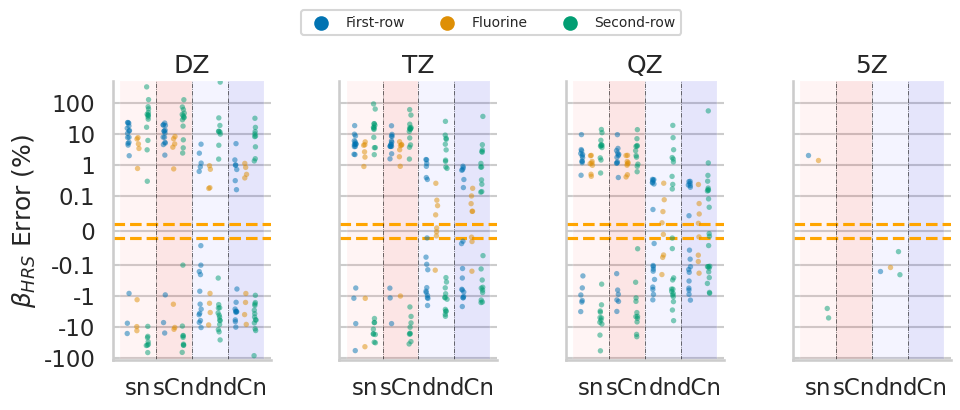

In [7]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

aspect_ratio = .5
Type_map = {"aug-cc-pVnZ": "sn", "aug-cc-pCVnZ": "sCn", "d-aug-cc-pVnZ": "dn",
            "d-aug-cc-pCVnZ": "dCn"}
vlevel = ['D', 'T', 'Q', '5']

plot_data = basis_data.query('valence.isin(@vlevel) and Afreq==0').query('beta_MRA>.15').copy()

with sns.plotting_context('talk', font_scale=1.00):
    g = sns.catplot(col='valence', x='Type', y='betaE', hue='mol_system',
                    data=plot_data, kind='strip', dodge=True, jitter=True,
                    s=15, palette='colorblind', height=4, aspect=aspect_ratio, sharey=True,
                    alpha=0.5,
                    sharex=False)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('{col_name}Z')
    g.set_xlabels('')

    g.set_xticklabels([Type_map[label.get_text()] for label in g.axes.flat[0].get_xticklabels()])
    v = 0
    for ax in g.axes.flat:
        # draw horizontal line at .05%
        # get the valence level from the title
        c = vlevel[v]
        v += 1
        print(c)
        xl = ['aug', 'aug+core', 'd-aug', 'd-aug+core']
        xl = ['s-n', 's-Cn', 'd-n', 'd-Cn']
        xl = ['sn', 'sCn', 'dn', 'dCn']
        ax.set_xticklabels(xl)

        ax.set_yscale('symlog', linthresh=1e-1)
        ax.axhline(y=.02, linestyle='--', color='orange')
        ax.axhline(y=-.02, linestyle='--', color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.yaxis.set_major_formatter(FormatStrFormatter('%2g'))

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim = max(abs(ax.get_ylim()[0]), abs(ax.get_ylim()[1]))

        ax.set_ylabel(r'$\beta_{HRS}$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(0)
            #label.set_horizontalalignment('right')
        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.Type.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5, alpha=.8)
        for i in range(1, 5):
            ax.axvspan((i - 1) - .5, i - .5, 1e-3, facecolor=pal[i - 1], alpha=0.1)
        # remove the legend title
    g.fig.tight_layout()
    # remove legend and create a new legend in 3 column format outside the plot
    g._legend.remove()
    g.fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.06), ncol=3, fancybox=True, fontsize=10)



In [8]:
basis_data = quad_data.beta_hrs_df.query('basis!="MRA" & Afreq==0.0').copy()
basis_data['beta_MRA'] = basis_data['molecule'].map(quad_data.beta_hrs_df.query('basis=="MRA" & '
                                                                                'Afreq==0.0')
                                                    .set_index('molecule')['Beta'].to_dict())
basis_data['betaE'] = 100 * (basis_data['Beta'] - basis_data['beta_MRA']) / basis_data['beta_MRA']
basis_data = make_detailed_df(basis_data)
basis_data


['D', 'T', 'Q', '5']


,molecule,basis,Afreq,Bfreq,Cfreq,dipolar,octupolar,Beta,beta_MRA,betaE,augmentation,polarization,mol_system,valence,Type
0,FNO,aug-cc-pVDZ,0.0,0.0,0.0,318.515549,171.917420,9.335648,8.660263,7.798662,aug,V,Fluorine,D,aug-cc-pVnZ
1,FNO,aug-cc-pVTZ,0.0,0.0,0.0,101.235090,27.045647,5.007241,8.660263,-42.181422,aug,V,Fluorine,T,aug-cc-pVnZ
2,FNO,aug-cc-pVQZ,0.0,0.0,0.0,261.019272,210.876440,8.836728,8.660263,2.037632,aug,V,Fluorine,Q,aug-cc-pVnZ
3,FNO,aug-cc-pV5Z,0.0,0.0,0.0,251.002691,225.886484,8.791551,8.660263,1.515983,aug,V,Fluorine,5,aug-cc-pVnZ
4,FNO,aug-cc-pCVDZ,0.0,0.0,0.0,323.232905,172.248828,9.393305,8.660263,8.464432,aug,CV,Fluorine,D,aug-cc-pCVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1141,LiBH4,d-aug-cc-pVTZ,0.0,0.0,0.0,12252.657663,3172.966713,55.000001,NaN,NaN,d-aug,V,First-row,T,d-aug-cc-pVnZ
1142,LiBH4,d-aug-cc-pVQZ,0.0,0.0,0.0,12126.958862,3166.483377,54.739836,NaN,NaN,d-aug,V,First-row,Q,d-aug-cc-pVnZ
1143,LiBH4,d-aug-cc-pCVDZ,0.0,0.0,0.0,12811.334379,3744.306712,56.600034,NaN,NaN,d-aug,CV,First-row,D,d-aug-cc-pCVnZ
1144,LiBH4,d-aug-cc-pCVTZ,0.0,0.0,0.0,12184.468668,3173.698902,54.862708,NaN,NaN,d-aug,CV,First-row,T,d-aug-cc-pCVnZ


In [9]:
basis_data = quad_data.q_df.query('basis!="MRA" & Afreq==0.0').copy()
basis_data['beta_MRA'] = basis_data['molecule'].map(quad_data.q_df.query('basis=="MRA" & '
                                                                         'Afreq==0.0')
                                                    .set_index('molecule')['Beta'].to_dict())

basis_data = basis_data.query('ijk=="ZZZ" & beta_MRA > .1')
basis_data['betaE'] = 100 * (basis_data['Beta'] - basis_data['beta_MRA']) / basis_data['beta_MRA']
basis_data = make_detailed_df(basis_data)
basis_data



['D', 'T', 'Q', '5']


,Afreq,Bfreq,Cfreq,ijk,basis,molecule,Beta,a,b,c,beta_MRA,betaE,augmentation,polarization,mol_system,valence,Type
67981,0.0,0.0,0.0,ZZZ,aug-cc-pVDZ,HOCl,37.2250,0.0,0.0,0.0,52.2522,-28.758980,aug,V,Second-row,D,aug-cc-pVnZ
68664,0.0,0.0,0.0,ZZZ,aug-cc-pVTZ,HOCl,45.4914,0.0,0.0,0.0,52.2522,-12.938785,aug,V,Second-row,T,aug-cc-pVnZ
69347,0.0,0.0,0.0,ZZZ,aug-cc-pVQZ,HOCl,49.9725,0.0,0.0,0.0,52.2522,-4.362879,aug,V,Second-row,Q,aug-cc-pVnZ
70030,0.0,0.0,0.0,ZZZ,aug-cc-pCVDZ,HOCl,37.5353,0.0,0.0,0.0,52.2522,-28.165130,aug,CV,Second-row,D,aug-cc-pCVnZ
70713,0.0,0.0,0.0,ZZZ,aug-cc-pCVTZ,HOCl,45.7908,0.0,0.0,0.0,52.2522,-12.365795,aug,CV,Second-row,T,aug-cc-pCVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695230,0.0,0.0,0.0,ZZZ,d-aug-cc-pVTZ,HCHO,37.0159,0.0,0.0,0.0,37.1185,-0.276412,d-aug,V,First-row,T,d-aug-cc-pVnZ
695913,0.0,0.0,0.0,ZZZ,d-aug-cc-pVQZ,HCHO,37.0149,0.0,0.0,0.0,37.1185,-0.279106,d-aug,V,First-row,Q,d-aug-cc-pVnZ
696596,0.0,0.0,0.0,ZZZ,d-aug-cc-pCVDZ,HCHO,37.7106,0.0,0.0,0.0,37.1185,1.595161,d-aug,CV,First-row,D,d-aug-cc-pCVnZ
697279,0.0,0.0,0.0,ZZZ,d-aug-cc-pCVTZ,HCHO,37.0226,0.0,0.0,0.0,37.1185,-0.258362,d-aug,CV,First-row,T,d-aug-cc-pCVnZ


/home/adrianhurtado/projects/QuantumResponsePro/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


D
T
Q
5


/tmp/ipykernel_81273/2908547667.py:34: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.02, linestyle='--', color='orange')
/tmp/ipykernel_81273/2908547667.py:35: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.02, linestyle='--', color='orange')


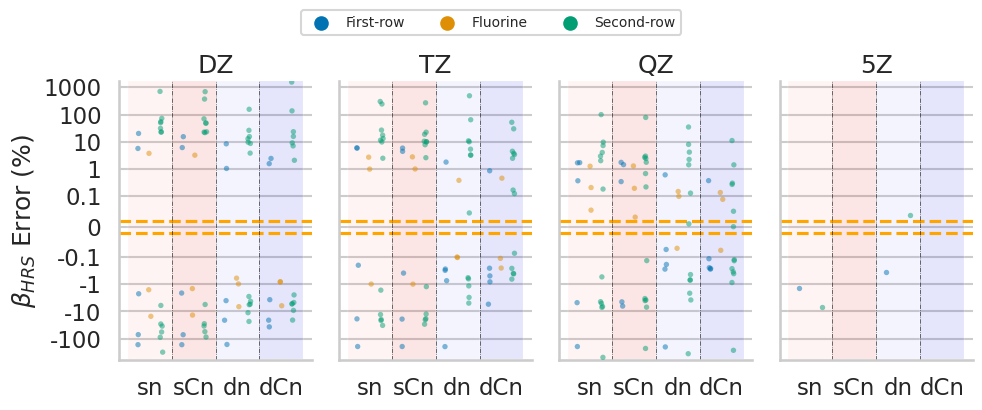

In [10]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

aspect_ratio = .5
Type_map = {"aug-cc-pVnZ": "sn", "aug-cc-pCVnZ": "sCn", "d-aug-cc-pVnZ": "dn",
            "d-aug-cc-pCVnZ": "dCn"}
vlevel = ['D', 'T', 'Q', '5']

plot_data = basis_data.query('valence.isin(@vlevel) and Afreq==0').query('beta_MRA>.15').copy()

with sns.plotting_context('talk', font_scale=1.00):
    g = sns.catplot(col='valence', x='Type', y='betaE', hue='mol_system',
                    data=plot_data, kind='strip', dodge=True, jitter=True,
                    s=15, palette='colorblind', height=4, aspect=aspect_ratio, sharey=True,
                    alpha=0.5,
                    sharex=False)
    # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
    g.set_titles('{col_name}Z')
    g.set_xlabels('')

    g.set_xticklabels([Type_map[label.get_text()] for label in g.axes.flat[0].get_xticklabels()])
    v = 0
    for ax in g.axes.flat:
        # draw horizontal line at .05%
        # get the valence level from the title
        c = vlevel[v]
        v += 1
        print(c)
        xl = ['aug', 'aug+core', 'd-aug', 'd-aug+core']
        xl = ['s-n', 's-Cn', 'd-n', 'd-Cn']
        xl = ['sn', 'sCn', 'dn', 'dCn']
        ax.set_xticklabels(xl)

        ax.set_yscale('symlog', linthresh=1e-1)
        ax.axhline(y=.02, linestyle='--', color='orange')
        ax.axhline(y=-.02, linestyle='--', color='orange')
        # for the symlog scale to regular notation with no decimal places for the y axis
        ax.yaxis.set_major_formatter(ScalarFormatter())
        ax.yaxis.set_major_formatter(FormatStrFormatter('%2g'))

        # make the y limits symmetrical for each plot using the max absolute value
        max_lim = max(abs(ax.get_ylim()[0]), abs(ax.get_ylim()[1]))

        ax.set_ylabel(r'$\beta_{HRS}$ Error (%)')
        # rotate the xlabels
        for label in ax.get_xticklabels():
            label.set_rotation(0)
            #label.set_horizontalalignment('right')
        # create vertical lines to separate basis sets
        for i in range(1, len(plot_data.Type.unique())):
            ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5, alpha=.8)
        for i in range(1, 5):
            ax.axvspan((i - 1) - .5, i - .5, 1e-3, facecolor=pal[i - 1], alpha=0.1)
        # remove the legend title
    g.fig.tight_layout()
    # remove legend and create a new legend in 3 column format outside the plot
    g._legend.remove()
    g.fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.06), ncol=3, fancybox=True, fontsize=10)
    


(1) Davidson, E. R.; Eichinger, B. E.; Robinson, B. H. Hyperpolarizability: Calibration of Theoretical Methods for Chloroform, Water, Acetonitrile, and p-Nitroaniline. Optical Materials 2006, 29 (4), 360–364. https://doi.org/10.1016/j.optmat.2006.03.031.


$$\beta_\parallel =\frac{1}{5} \sum_{i=x}^z ( \beta_{iiz}+ \beta_{izi} + \beta_{zii} )$$

In [11]:

# get the data for the parallel component
def get_beta_parallel(quad_data):

    q_df = quad_data.q_df.copy()
    # set the index to Afreq,Bfreq,Cfreq,ijk,basis,molecule
    q_df.set_index(['Afreq', 'Bfreq', 'Cfreq', 'basis', 'molecule'], inplace=True)
    dir = ['X', 'Y', 'Z']
    b=[]
    
    for d in dir:
        index_1 = 'ZZ{}'.format(d)
        index_2 = 'Z{}Z'.format(d)
        index_3 = '{}ZZ'.format(d)
        print(index_1, index_2, index_3)
        b1=q_df.query('ijk==@index_1').Beta
        b2=q_df.query('ijk==@index_2').Beta
        b3=q_df.query('ijk==@index_3').Beta
        bi = (b1+b2+b3)/5
        b.append(bi)
    
    
    # sum all of b
    b = sum(b)
    b=b.reset_index()
    return b

b=get_beta_parallel(quad_data)


ZZX ZXZ XZZ
ZZY ZYZ YZZ
ZZZ ZZZ ZZZ


In [12]:
# take the error

def get_error(data):
    basis_data = data.query('basis!="MRA" & Afreq==0.0').copy()
    basis_data['beta_MRA'] = basis_data['molecule'].map(data.query('basis=="MRA" & '
                                                                             'Afreq==0.0')
                                                        .set_index('molecule')['Beta'].to_dict())
    basis_data['betaE'] = 100 * (basis_data['Beta'] - basis_data['beta_MRA']) / basis_data['beta_MRA']
    basis_data = make_detailed_df(basis_data).query('beta_MRA>.5')
    return basis_data
b_error=get_error(b.reset_index())
b_error


['D', 'Q', 'T', '5']


,index,Afreq,Bfreq,Cfreq,basis,molecule,Beta,beta_MRA,betaE,augmentation,polarization,mol_system,valence,Type
60,60,0.0,0.0,0.0,aug-cc-pCVDZ,BF,33.125160,38.313345,-13.541457,aug,CV,Fluorine,D,aug-cc-pCVnZ
61,61,0.0,0.0,0.0,aug-cc-pCVDZ,BF,33.125160,38.313345,-13.541457,aug,CV,Fluorine,D,aug-cc-pCVnZ
62,62,0.0,0.0,0.0,aug-cc-pCVDZ,BF,33.125160,38.313345,-13.541457,aug,CV,Fluorine,D,aug-cc-pCVnZ
63,63,0.0,0.0,0.0,aug-cc-pCVDZ,BF,33.125160,38.313345,-13.541457,aug,CV,Fluorine,D,aug-cc-pCVnZ
108,108,0.0,0.0,0.0,aug-cc-pCVDZ,CH3Cl,12.316172,1.542916,698.240193,aug,CV,Second-row,D,aug-cc-pCVnZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3807,3807,0.0,0.0,0.0,d-aug-cc-pVTZ,SiH3Cl,25.903674,24.570856,5.424386,d-aug,V,Second-row,T,d-aug-cc-pVnZ
3816,3816,0.0,0.0,0.0,d-aug-cc-pVTZ,SiO,74.292600,74.766889,-0.634357,d-aug,V,Second-row,T,d-aug-cc-pVnZ
3817,3817,0.0,0.0,0.0,d-aug-cc-pVTZ,SiO,74.292600,74.766889,-0.634357,d-aug,V,Second-row,T,d-aug-cc-pVnZ
3818,3818,0.0,0.0,0.0,d-aug-cc-pVTZ,SiO,74.292600,74.766889,-0.634357,d-aug,V,Second-row,T,d-aug-cc-pVnZ


In [13]:

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

aspect_ratio = .5
Type_map = {"aug-cc-pVnZ": "sn", "aug-cc-pCVnZ": "sCn", "d-aug-cc-pVnZ": "dn",
            "d-aug-cc-pCVnZ": "dCn"}
vlevel = ['D', 'T', 'Q']

def plot_basis_data(basis_data,title):
    plot_data = basis_data.query('valence.isin(@vlevel) and Afreq==0').query('beta_MRA>.15').copy()
    plot_data.valence = plot_data.valence.cat.remove_unused_categories()
    # remove unused valence levels from categories
    
    with sns.plotting_context('talk', font_scale=1.00):
        g = sns.catplot(col='valence', x='Type', y='betaE', hue='mol_system',
                        data=plot_data, kind='strip', dodge=True, jitter=True,
                        s=15, palette='colorblind', height=4, aspect=aspect_ratio, sharey=True,
                        alpha=0.5,
                        sharex=False)
        # adjust the title to read D=$\zeta$D, T=$\zeta$T, etc.
        g.set_titles('{col_name}Z')
        g.set_xlabels('')
    
        g.set_xticklabels([Type_map[label.get_text()] for label in g.axes.flat[0].get_xticklabels()])
        v = 0
        for ax in g.axes.flat:
            # draw horizontal line at .05%
            # get the valence level from the title
            c = vlevel[v]
            v += 1
            print(c)
            xl = ['aug', 'aug+core', 'd-aug', 'd-aug+core']
            xl = ['s-n', 's-Cn', 'd-n', 'd-Cn']
            xl = ['sn', 'sCn', 'dn', 'dCn']
            ax.set_xticklabels(xl)
    
            ax.set_yscale('symlog', linthresh=1e-1)
            ax.axhline(y=.02, linestyle='--', color='orange')
            ax.axhline(y=-.02, linestyle='--', color='orange')
            # for the symlog scale to regular notation with no decimal places for the y axis
            ax.yaxis.set_major_formatter(ScalarFormatter())
            ax.yaxis.set_major_formatter(FormatStrFormatter('%2g'))
    
            # make the y limits symmetrical for each plot using the max absolute value
            max_lim = max(abs(ax.get_ylim()[0]), abs(ax.get_ylim()[1]))
    
            ax.set_ylabel(title+' Error (%)'.format(title))
            # rotate the xlabels
            for label in ax.get_xticklabels():
                label.set_rotation(0)
                #label.set_horizontalalignment('right')
            # create vertical lines to separate basis sets
            for i in range(1, len(plot_data.Type.unique())):
                ax.axvline(i - .5, linestyle='-.', color='k', linewidth=.5, alpha=.8)
            for i in range(1, 5):
                ax.axvspan((i - 1) - .5, i - .5, 1e-3, facecolor=pal[i - 1], alpha=0.1)
            # remove the legend title
        g.fig.tight_layout()
        # remove legend and create a new legend in 3 column format outside the plot
        g._legend.remove()
        g.fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.06), ncol=3, fancybox=True, fontsize=10)
        return g



/home/adrianhurtado/projects/QuantumResponsePro/venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_81273/3476329039.py:37: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=.02, linestyle='--', color='orange')
/tmp/ipykernel_81273/3476329039.py:38: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  ax.axhline(y=-.02, linestyle='--', color='orange')


D
T
Q


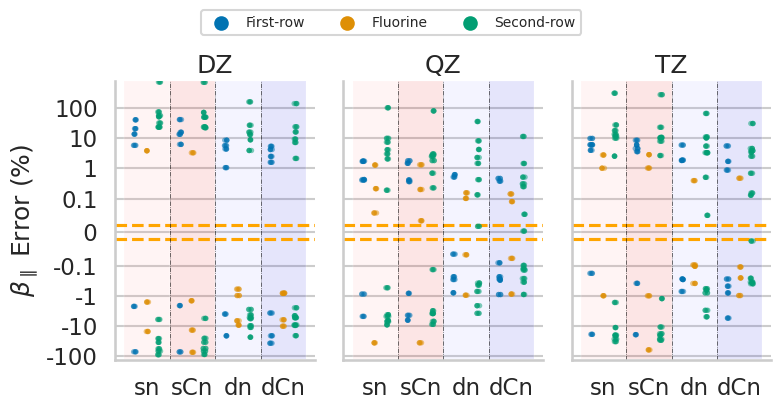

In [14]:
g=plot_basis_data(b_error,r'$\beta_\parallel$')
g.savefig(paper_path.joinpath('beta_parallel.svg'),bbox_inches='tight')

In [15]:
mols

['FNO',
 'CH3SH',
 'C2H4',
 'H2',
 'Cl2',
 'N2H2',
 'CH3NH2',
 'HOCl',
 'BeH2',
 'SiO',
 'Mg',
 'HBS',
 'HBO',
 'CH2BH',
 'Ne',
 'PH3O',
 'ClF',
 'HF',
 'BH2Cl',
 'Li2',
 'SiH4',
 'SF2',
 'P2H4',
 'CO2',
 'NaCN',
 'Ar',
 'OCl2',
 'P2',
 'CH3Cl',
 'SCl2',
 'HCCF',
 'LiH',
 'BF',
 'SiH3F',
 'HCONH2',
 'He',
 'CS',
 'S2H2',
 'FCN',
 'NaCl',
 'SiH3Cl',
 'N2H4',
 'NH2Cl',
 'LiCl',
 'NH3O',
 'NH2OH',
 'BH3',
 'SO2',
 'HCN',
 'CH3BH2',
 'NaLi',
 'HOF',
 'CH3F',
 'HNS',
 'CH3OH',
 'C2H2',
 'Na2',
 'F2',
 'O3',
 'C6H6',
 'CH2NH',
 'ClCN',
 'Mg2',
 'NH3',
 'H2O',
 'PH3',
 'N2',
 'BHF2',
 'LiCN',
 'NH2F',
 'Be',
 'CH4',
 'HCl',
 'HCCCl',
 'HCOOH',
 'HCHS',
 'LiH_s',
 'HCHO',
 'SH2',
 'CSO',
 'HOOH',
 'CO',
 'HCP',
 'NOCl',
 'HNO',
 'NaH',
 'OF2',
 'HNC',
 'BH2F',
 'LiBH4']

In [16]:
all_mols=set(mols)
complete=set(quad_data.q_df.dropna().molecule.unique())

In [17]:
left=list(all_mols.difference(complete))
' '.join(left[0:15])

'CO2 P2 CO ClF HCP BH2Cl BH3 BH2F SO2 SH2 CH2BH Ne OF2 C6H6 CH3BH2'

In [18]:

' '.join(left[15:])


'SiH4 HF HOOH HBO CH3NH2 NH2OH SF2 CSO HNO P2H4 NaH HCHS NOCl LiBH4 HNC NaCN HCN Li2 PH3O'

In [19]:
beta_mols=list(quad_data.beta_hrs_df.query('Beta>.15').molecule.dropna().unique())

In [20]:
len(beta_mols)

75

In [21]:
beta_mols

['FNO',
 'CH3SH',
 'N2H2',
 'CH3NH2',
 'HOCl',
 'SiO',
 'HBS',
 'HBO',
 'CH2BH',
 'PH3O',
 'ClF',
 'HF',
 'BH2Cl',
 'Li2',
 'SiH4',
 'SF2',
 'P2H4',
 'NaCN',
 'OCl2',
 'CH3Cl',
 'SCl2',
 'HCCF',
 'LiH',
 'BF',
 'SiH3F',
 'HCONH2',
 'CS',
 'S2H2',
 'FCN',
 'NaCl',
 'SiH3Cl',
 'N2H4',
 'NH2Cl',
 'LiCl',
 'NH3O',
 'NH2OH',
 'BH3',
 'SO2',
 'HCN',
 'CH3BH2',
 'NaLi',
 'HOF',
 'CH3F',
 'HNS',
 'CH3OH',
 'Na2',
 'O3',
 'CH2NH',
 'ClCN',
 'Mg2',
 'NH3',
 'H2O',
 'PH3',
 'BHF2',
 'LiCN',
 'NH2F',
 'CH4',
 'HCl',
 'HCCCl',
 'HCOOH',
 'HCHS',
 'LiH_s',
 'HCHO',
 'SH2',
 'CSO',
 'HOOH',
 'CO',
 'HCP',
 'NOCl',
 'HNO',
 'NaH',
 'OF2',
 'HNC',
 'BH2F',
 'LiBH4']

In [22]:
' '.join(beta_mols[0:15])


'FNO CH3SH N2H2 CH3NH2 HOCl SiO HBS HBO CH2BH PH3O ClF HF BH2Cl Li2 SiH4'

In [23]:
' '.join(beta_mols[15:30])


'SF2 P2H4 NaCN OCl2 CH3Cl SCl2 HCCF LiH BF SiH3F HCONH2 CS S2H2 FCN NaCl'

In [24]:
' '.join(beta_mols[30:45])


'SiH3Cl N2H4 NH2Cl LiCl NH3O NH2OH BH3 SO2 HCN CH3BH2 NaLi HOF CH3F HNS CH3OH'

In [25]:
' '.join(beta_mols[45:60])


'Na2 O3 CH2NH ClCN Mg2 NH3 H2O PH3 BHF2 LiCN NH2F CH4 HCl HCCCl HCOOH'

In [26]:
' '.join(beta_mols[60:75])


'HCHS LiH_s HCHO SH2 CSO HOOH CO HCP NOCl HNO NaH OF2 HNC BH2F LiBH4'

In [27]:
# Completed molecules
' '.join(complete)

'C2H2 H2 BeH2 CH3SH CH3Cl CS CH4 HCOOH HBS Cl2 OCl2 SCl2 He CH3OH SiH3Cl CH2NH NH3O ClCN HOCl HOF BF FNO Be NaCl PH3 C2H4 N2 SiH3F N2H4 HCONH2 NaLi HCl N2H2 S2H2 NH2Cl SiO LiCl LiCN Na2 Ar HNS CH3F Mg2 BHF2 O3 LiH H2O NH2F Mg NH3 FCN HCCF F2 HCHO HCCCl LiH_s'